In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
colors_dict = {
    "Red": "#8c0404",
    "Pink": "#f25ed0",
    "Black": "#000000",
    "Green": "#16A085",
    "Dark Blue": "#34495E",
    "Navy Blue": "#21618C",
    "Purple": "#512E5F",
    "Turquoise": "#45B39D",
    "Gray": "#AAB7B8",
    "Light Blue": "#20B2AA",
    "Hot Pink": "#FF69B4",
    "Dark Turquoise": "#00CED1",
    "Coral": "#FF7F50",
    "Lime": "#7FFF00",
    "Orchid": "#DA70D6"
}

In [ ]:
df = pd.read_csv('pizza_sales.csv', encoding='latin1')
print(df)

       pizza_id  order_id  pizza_name_id  quantity  order_date order_time  \
0           1.0       1.0     hawaiian_m       1.0    1/1/2015   11:38:36   
1           2.0       2.0  classic_dlx_m       1.0    1/1/2015   11:57:40   
2           3.0       2.0  five_cheese_l       1.0    1/1/2015   11:57:40   
3           4.0       2.0    ital_supr_l       1.0    1/1/2015   11:57:40   
4           5.0       2.0     mexicana_m       1.0    1/1/2015   11:57:40   
...         ...       ...            ...       ...         ...        ...   
48615   48616.0   21348.0  ckn_alfredo_m       1.0  31-12-2015   21:23:10   
48616   48617.0   21348.0  four_cheese_l       1.0  31-12-2015   21:23:10   
48617   48618.0   21348.0   napolitana_s       1.0  31-12-2015   21:23:10   
48618   48619.0   21349.0     mexicana_l       1.0  31-12-2015   22:09:54   
48619   48620.0   21350.0      bbq_ckn_s       1.0  31-12-2015   23:02:05   

       unit_price  total_price pizza_size pizza_category  \
0           13.

## Exploratory Data Analysis (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  float64
 1   order_id           48620 non-null  float64
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  float64
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.5+ MB


In [ ]:
df.isna().sum()

,0
pizza_id,0
order_id,0
pizza_name_id,0
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,0
pizza_size,0
pizza_category,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [ ]:
df.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [ ]:
# replace the abbreciations

df['pizza_size'] = df['pizza_size'].replace({'S' : 'Small', 'M' : 'Medium', 'L' : 'Large', 'XL' : 'X-Large', 'XXL' : 'XX-Large'})

In [ ]:
# grouping by 'order_id' and summing the 'total_price' for each unique order

total_sales_per_order = df.groupby('order_id')['total_price'].sum().reset_index()
total_sales_per_order

,order_id,total_price
0,1.0,13.25
1,2.0,92.00
2,3.0,37.25
3,4.0,16.50
4,5.0,16.50
...,...,...
21345,21346.0,62.25
21346,21347.0,66.50
21347,21348.0,46.70
21348,21349.0,20.25


## Data Visualization

1. What is the most selling pizza?

In [ ]:
top_5_sold_pizza = df.groupby('pizza_name')['total_price'].sum().nlargest(5).reset_index()
top_5_sold_pizza

,pizza_name,total_price
0,The Thai Chicken Pizza,43434.25
1,The Barbecue Chicken Pizza,42768.00
2,The California Chicken Pizza,41409.50
3,The Classic Deluxe Pizza,38180.50
4,The Spicy Italian Pizza,34831.25


Text(0, 0.5, 'Count')

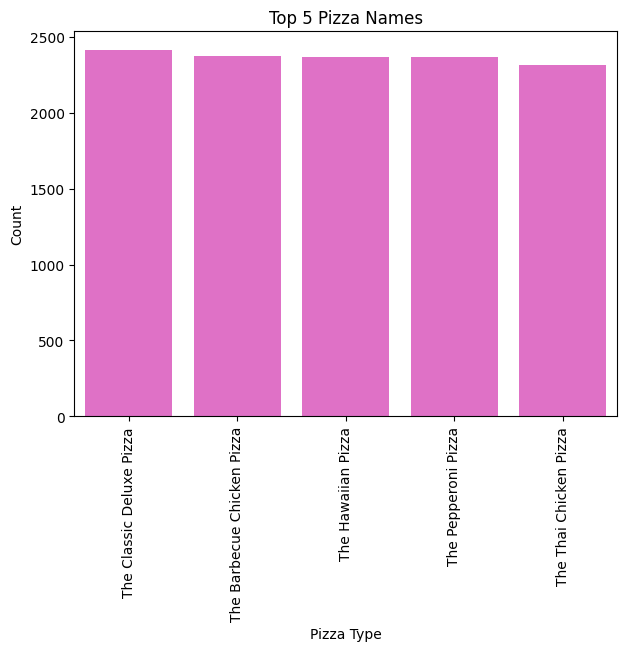

In [ ]:
top_5_types = df['pizza_name'].value_counts().head(5).index.tolist()

plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='pizza_name', order=top_5_types ,color = colors_dict["Pink"] )
plt.xticks(rotation=90)
plt.title('Top 5 Pizza Names')
plt.xlabel('Pizza Type')
plt.ylabel('Count')

2. What is the most selling category?

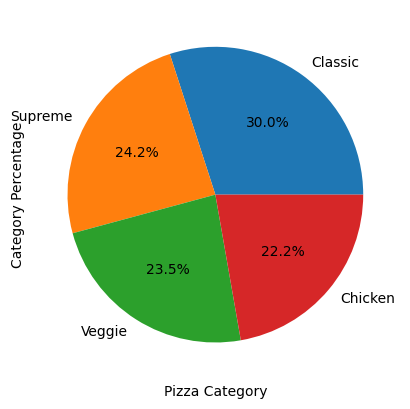

In [ ]:
df['pizza_category'].value_counts().plot(kind='pie', autopct="%0.1f%%")
plt.xlabel('Pizza Category')
plt.ylabel('Category Percentage')
plt.show()

3. Number of sales of each pizza size

Text(0, 0.5, 'pizza counts')

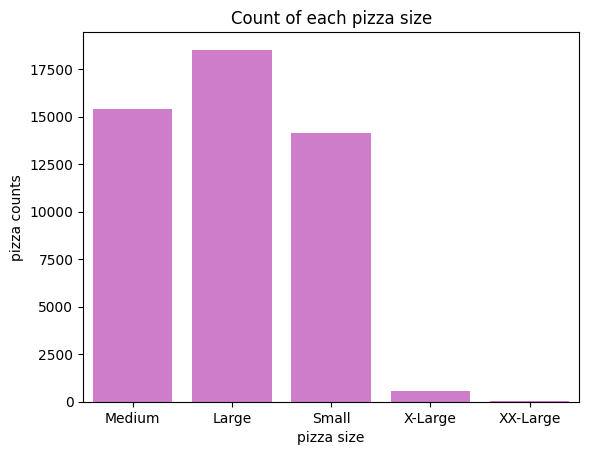

In [ ]:
sns.countplot(data =df , x= 'pizza_size' , color =colors_dict["Orchid"])
plt.title('Count of each pizza size')
plt.xlabel('pizza size')
plt.ylabel('pizza counts')

4. How is the distribution of total price by the category?

Text(0, 0.5, 'pizza counts')

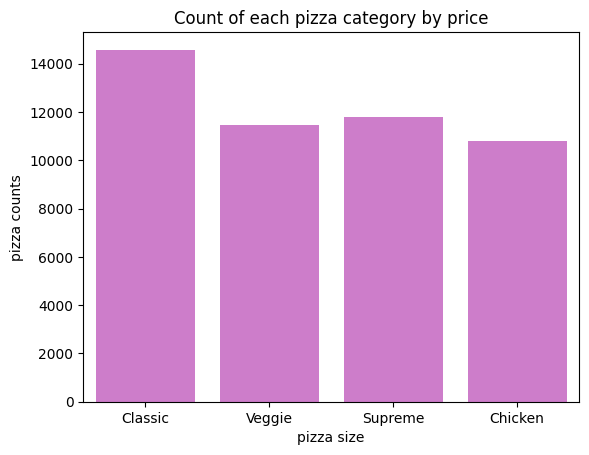

In [ ]:
sns.countplot(data =df , x= 'pizza_category' , color =colors_dict["Orchid"])
plt.title('Count of each pizza category by price')
plt.xlabel('pizza size')
plt.ylabel('pizza counts')